# Etapa II - Projeto I - Aplicação de Métodos de Aprendizagem de Máquina

Importação das bibliotecas

In [1]:
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

Arquivo específico de configuração. 
Será separada algumas informações em arquivo próprio (.py) visando melhorar a configuração
e possível portabilidade entre computadores evitando editar esse arquivo.

In [2]:
import config
#config start
dataset = config.dataset + "IODP/"
#-----------

Definição de funções específicas para utilização no código
Função: print_accuracy_report - imprime resumo completo do cross validation.
Função: plot_confusion_matrix - imprime resumo completo da matriz confusão.

In [3]:
#functions-----
def print_accuracy_report(classifier_rf, X_train, y_train, num_validations=5):
    accuracy = cross_val_score(classifier_rf, X_train, y_train, scoring='accuracy', cv=num_validations)
    print ("Accuracy:" + str(round(100*accuracy.mean(), 2)) + "%")
    f1 = cross_val_score(classifier_rf,X_train, y_train, scoring='f1_macro', cv=num_validations)
    print ("F1: " + str(round(100*f1.mean(), 2)) + "%")
    precision = cross_val_score(classifier_rf,X_train, y_train, scoring='precision_weighted', cv=num_validations)
    print ("Precision: " + str(round(100*precision.mean(), 2)) + "%")
    recall = cross_val_score(classifier_rf, X_train, y_train, scoring='recall_weighted', cv=num_validations)
    print ("Recall: " + str(round(100*recall.mean(), 2)) + "%") 
    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues
                          ):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)


    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.xlim(-0.5, 5.5) #figure size according to quantity of cod_lit
    plt.ylim(5.5, -0.5) #figure size according to quantity of cod_lit



    plt.tight_layout()
    plt.ylabel('Predicted label')
    plt.xlabel('True label')   
#-------------------

Importar - conexão com o dataset.
Para conexão utiliza-se a biblioteca pandas com a função read_csv() resultado na saída um dataframe

In [4]:
name_file = dataset+"dataset_IODP_template_GP.csv"
          

importDt = pd.read_csv(name_file,sep=",")

Imprime o nome completo da url do dataset.

In [5]:
name_file

'datasets/IODP/dataset_IODP_template_GP.csv'

Aplicar os métodos de pré-processamento:

Método 1: Limpeza da base, onde serão removidos espaços em branco e tipos NaN
Para espaços em branco será utilizado a propriedade pandas dataframe replace.
Para tipos NaN será utilizada a propriedade pandas dataframe isna() (true ou false) e propriedade loc para encontrar o valor entre true e false. valor True indica o registro como NaN e caso contrário indica false.

Método 2: Normalizar os dados: será utilizada a função normalize usando a norma max.
Dimensionar os registros de uma forma padrão visando criar uma normalização entre os registros, neste caso, a norma max. Essa função é a maneira mais comum e rápida de dimensionar os dados seguindo o dimensionamento por cada feature individualmente.

Aplicar o método 1 de pré-processamento: Limpeza da base.
Passo 1: Encontrar valores em branco ou vazio (' ') e remover.

In [6]:
importDt["Offset (cm)"]  = importDt["Offset (cm)"].replace(' ', '')
importDt["GRA"]          = importDt["GRA"].replace(' ', '')
importDt["P-wave"]       = importDt["P-wave"].replace(' ', '')
importDt["caliper"]      = importDt["caliper"].replace(' ', '')
importDt["sonic"]        = importDt["sonic"].replace(' ', '')
importDt["MS"]           = importDt["MS"].replace(' ', '')
importDt["ReflectanceL"] = importDt["ReflectanceL"].replace(' ', '')
importDt["Reflectancea"] = importDt["Reflectancea"].replace(' ', '')
importDt["Reflectanceb"] = importDt["Reflectanceb"].replace(' ', '')
importDt["TristimulusX"] = importDt["TristimulusX"].replace(' ', '')
importDt["TristimulusY"] = importDt["TristimulusY"].replace(' ', '')
importDt["TristimulusZ"] = importDt["TristimulusZ"].replace(' ', '')
importDt["cod_lit"]      = importDt["cod_lit"].replace(' ', '')

Continuação do método 1: 
Passo 2: Verificar campos do tipo NaN. Para a feature: Offset (cm), caso encontre um valor NaN será removido. 
Para as demais features será preenchido utilizando o valor da média.

In [7]:
test_isna = importDt.isna()

In [8]:
remove_isna = test_isna.loc[test_isna['Offset (cm)'] == True]
indexx = remove_isna.index
importDt = importDt.drop(indexx)

In [9]:
importDt[['GRA','P-wave','caliper','sonic','MS','ReflectanceL','Reflectancea','Reflectanceb','TristimulusX','TristimulusY','TristimulusZ']] = importDt[['GRA','P-wave','caliper','sonic','MS','ReflectanceL','Reflectancea','Reflectanceb','TristimulusX','TristimulusY','TristimulusZ']].fillna(value=importDt[['GRA','P-wave','caliper','sonic','MS','ReflectanceL','Reflectancea','Reflectanceb','TristimulusX','TristimulusY','TristimulusZ']].mean())

É visualizado um trecho de dados do dataset, por default (5 registros)
importDt é do tipo dataframe com linhas x colunas (linhas são os registros e colunas são as features)

In [10]:
importDt.head()

,Exp,Site,Hole,Core,Type,Sect,Offset (cm),Depth CSF-A (m),GRA,P-wave,caliper,sonic,MS,ReflectanceL,Reflectancea,Reflectanceb,TristimulusX,TristimulusY,TristimulusZ,cod_lit
0,354,U1449,A,2,H,1,12.5,6325,1797.0,1647,6.42,38.97,134.00,30.6,1.5,-0.1,6.3,6.5,7.0,10
1,354,U1449,A,2,H,1,15.0,6350,1804.0,1739,6.40,36.79,140.00,32.5,0.8,-0.6,7.0,7.3,8.0,10
2,354,U1449,A,2,H,1,17.5,6375,1803.0,1725,6.41,37.15,168.33,30.9,0.4,0.3,6.3,6.6,7.0,10
3,354,U1449,A,2,H,1,20.0,6400,1705.0,1729,6.41,37.08,228.00,29.2,1.2,-0.3,5.7,5.9,6.4,10
4,354,U1449,A,2,H,1,22.5,6425,1799.0,1644,6.43,39.11,286.67,31.3,0.5,-0.4,6.5,6.8,7.4,10


Tamanho do dataset em linhas x colunas (registros x features)

In [11]:
importDt.shape

(19560, 20)

Divisão dos registros entre as litologias conforme definido no projeto.

In [24]:
count_cod_lit = importDt["cod_lit"].value_counts()

In [25]:
count_cod_lit

15    8760
14    5679
10    3932
12     669
11     361
13     159
Name: cod_lit, dtype: int64

Selecionando as features para treinamento e teste:
a variável X possui as features para treinamento e teste
a variável z possui a feature específico para predição (somente a feature cod_lit)

In [26]:
features = importDt.columns.difference(["Exp", "Site", "Hole","Core","Type","Sect","Depth CSF-A (m)","cod_lit"])


X = np.array(importDt[features].values)
y = np.array(importDt['cod_lit'].values)


Dividir/particionar os dados:
    Conforme especificado no projeto, é dividido os dados conforme a combinação:
        Train e teste respectivamente: 70%-30%.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42)

Aplicar o método 2 de pré-processamento: normalização.
axis=0 indica que cada feature é normalizada separadamente.

In [28]:
X_trainnormalized = preprocessing.normalize(X_train, norm='max', axis=0)
X_testnormalized  = preprocessing.normalize(X_test, norm='max', axis=0)

Aplicação do algoritmo: Random Forest.
A configuração max_depth e n_estimators segue um valor definido de forma arbitrária conforme os melhores valores observados 
entre treinamento e teste. Observa-se que partir de n_estimators=400 estabeliza-se o valor  da acurácia.

In [55]:
classifier_rf = RandomForestClassifier(max_depth=10, n_estimators=400, random_state=42, n_jobs=-1)
classifier_rf.fit(X_trainnormalized, y_train)

RandomForestClassifier(max_depth=10, n_estimators=400, n_jobs=-1,
                       random_state=42)

In [ ]:
Utilização de métricas para avaliar os resultados.

In [56]:
y_pred = classifier_rf.predict(X_testnormalized)

In [57]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

          10       0.64      0.73      0.68      1014
          11       0.00      0.00      0.00         0
          12       0.29      0.66      0.40        90
          13       0.00      0.00      0.00         0
          14       0.81      0.62      0.70      2192
          15       0.93      0.96      0.95      2572

    accuracy                           0.79      5868
   macro avg       0.44      0.50      0.46      5868
weighted avg       0.82      0.79      0.80      5868



In [58]:
print ("Accuracy: ")
print(metrics.accuracy_score(y_pred, y_test))

Accuracy: 
0.7907293796864349


In [59]:
print ("Report cross-validatin: ")
print_accuracy_report(classifier_rf, X_train, y_train)

Report Accuracy: 
Accuracy:84.25%
F1: 52.44%
Precision: 84.76%
Recall: 84.25%


Confusion matrix, without normalization
[[ 744    0    1    0  417    7]
 [  25    0    2    0   75    0]
 [   8    0   59    0  133    2]
 [  21    0    6    0   24    0]
 [ 211    0   21    0 1366   92]
 [   5    0    1    0  177 2471]]


<Figure size 576x432 with 0 Axes>

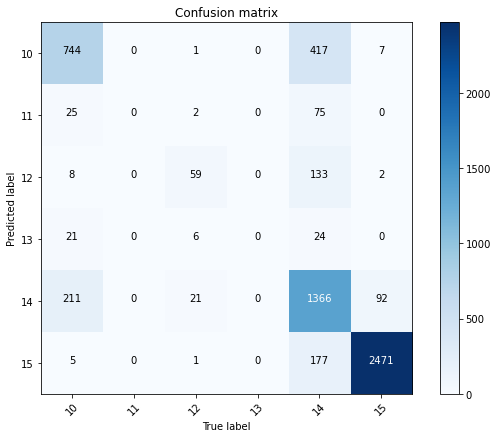

In [82]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
class_names = list(config.litho) #ajust cod_lit in config file.
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

plt.show()